In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file = '/content/blogtext.csv'
data = pd.read_csv(
    str(file),
    on_bad_lines="skip",
    engine='python',)
df = pd.DataFrame(data)
# Показать все колонки
pd.set_option('display.max_columns', None)
# Вывод 5 первых строк
print(df.head())

        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   
2  3581210   male   33  InvestmentBanking  Aquarius  10,June,2004   
3  3581210   male   33  InvestmentBanking  Aquarius  09,June,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  09,June,2004   

                                                text  
0             Info has been found (+/- 100 pages,...  
1               Thanks to Yahoo!'s Toolbar I can ...  
2               Take a read of this news article ...  
3               Last night was pretty fun...mostl...  
4                urlLink    Wonderful oh-gyup-sal...  


In [ ]:
# Показать кол-во строк
print(df.shape)

(61528, 7)


In [ ]:
df.dtypes

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64


<Axes: >

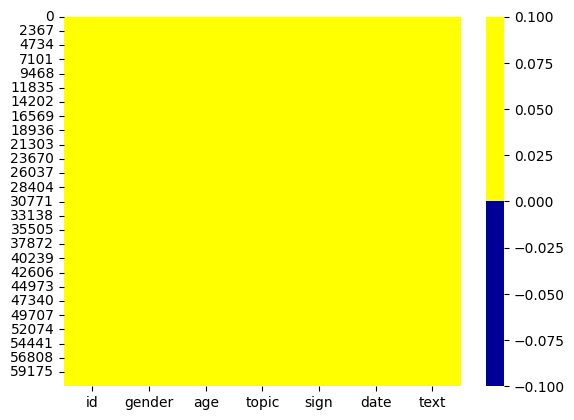

In [ ]:
import seaborn as sns
# Проверка на пустые значения
missing_values = df.isnull().sum()
print(missing_values)

# Желтый -  не пропущенные данные, синий -  пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [ ]:
# Удаление колонок id и data
df.drop(['id','date'], axis=1, inplace=True)

In [ ]:
# Преобразование текста
import re
df['clean_text']=df['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ',x))
df['clean_text']=df['clean_text'].apply(lambda x: x.lower())
df['clean_text']=df['clean_text'].apply(lambda x: x.strip())
print(df.head())

        id gender  age              topic      sign          date  \
0  2059027   male   15            Student       Leo   14,May,2004   
1  3581210   male   33  InvestmentBanking  Aquarius  11,June,2004   
2  3581210   male   33  InvestmentBanking  Aquarius  10,June,2004   
3  3581210   male   33  InvestmentBanking  Aquarius  09,June,2004   
4  3581210   male   33  InvestmentBanking  Aquarius  09,June,2004   

                                                text  \
0             Info has been found (+/- 100 pages,...   
1               Thanks to Yahoo!'s Toolbar I can ...   
2               Take a read of this news article ...   
3               Last night was pretty fun...mostl...   
4                urlLink    Wonderful oh-gyup-sal...   

                                          clean_text  
0  info has been found pages and mb of pdf files ...  
1  thanks to yahoo s toolbar i can now capture th...  
2  take a read of this news article from urllink ...  
3  last night was pretty fun

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Удаление стоп-слов
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
df['clean_text']=df['clean_text'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [ ]:
from tensorflow.keras.preprocessing import text
from keras.preprocessing.sequence import pad_sequences
# Токенизация текста
tokenizer = text.Tokenizer(num_words=2000, split=' ')
tokenizer.fit_on_texts(df['clean_text'].values)
X = tokenizer.texts_to_sequences(df['clean_text'].values)
X = pad_sequences(X)

In [ ]:
df.drop(['text'], axis=1, inplace=True)

In [ ]:
# Создание словаря для параметра "Возраст"
gender_labels = df['gender'].unique()
gender_dict = {i+1: label for i, label in enumerate(gender_labels)}

# Создание словаря для параметра "Возраст"
age_labels = df['age'].unique()
age_dict = {i+1: label for i, label in enumerate(age_labels)}

# Создание словаря для параметра "Вид деятельности"
topic_labels = df['topic'].unique()
topic_dict = {i+1: label for i, label in enumerate(topic_labels)}

# Создание словаря для параметра "Возраст"
sign_labels = df['sign'].unique()
sign_dict = {i+1: label for i, label in enumerate(sign_labels)}
print(gender_dict)

{1: 'male', 2: 'female'}


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Создание LabelEncoder
le = LabelEncoder()

# Преобразование каждой колонки меток в целые числа
df['gender'] = le.fit_transform(df['gender'])
df['age'] = le.fit_transform(df['age'])
df['topic'] = le.fit_transform(df['topic'])
df['sign'] = le.fit_transform(df['sign'])

In [ ]:
# Получение количества уникальных классов для каждой метки
num_gender_classes = len(np.unique(df['gender']))
num_age_classes = len(np.unique(df['age']))
num_topic_classes = len(np.unique(df['topic']))
num_sign_classes = len(np.unique(df['sign']))

In [ ]:
from keras.utils import to_categorical
# Преобразование меток в one-hot векторы
Y_gender = to_categorical(df['gender'], num_classes=num_gender_classes)
Y_age = to_categorical(df['age'], num_classes=num_age_classes)
Y_topic = to_categorical(df['topic'], num_classes=num_topic_classes)
Y_sign = to_categorical(df['sign'], num_classes=num_sign_classes)

In [ ]:
# Объединение one-hot векторов в одну матрицу меток
Y = np.concatenate((Y_gender, Y_age, Y_topic, Y_sign), axis=1)

In [ ]:
#проверка на выбросы
df.describe()

,gender,age,topic,sign
count,10837.000000,10837.000000,10837.000000,10837.000000
mean,0.514164,6.971117,29.487589,4.959122
std,0.499822,4.437790,11.627801,3.476771
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,19.000000,1.000000
50%,1.000000,6.000000,34.000000,5.000000
75%,1.000000,9.000000,39.000000,8.000000
max,1.000000,25.000000,39.000000,11.000000


<Axes: xlabel='gender'>

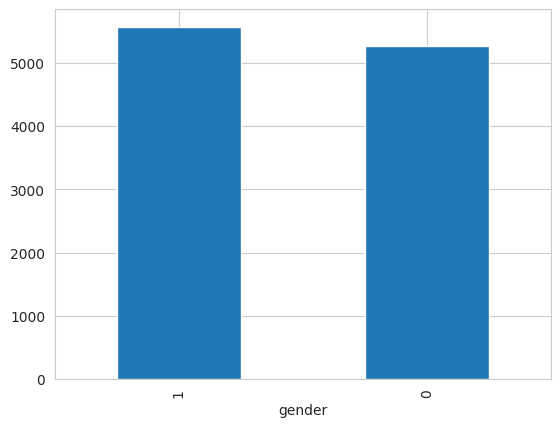

In [ ]:
df['gender'].value_counts().plot.bar()

In [ ]:
# Общее количество классов
total_classes = num_gender_classes + num_age_classes + num_topic_classes + num_sign_classes
print(total_classes)

80


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
# Создание модели
model = Sequential()

# Добавление выходного слоя Embedding
model.add(Embedding(3000, 256, input_length = X.shape[1]))

# Добавление скрытого слоя
model.add(SpatialDropout1D(0.4))
model.add(LSTM(128, activation='tanh', recurrent_activation='sigmoid',  dropout=0.4, recurrent_dropout=0, use_bias=True, return_sequences=True))
model.add(LSTM(64, activation='tanh', recurrent_activation='sigmoid',  dropout=0.4, recurrent_dropout=0, use_bias=True))
model.add(Dropout(0.5))
# Добавление выходного слоя
model.add(Dense(total_classes, activation='relu'))


# Компиляция модели
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])


In [ ]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Обучение модели
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=2, validation_data=(X_test, Y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
1159/1159 - 417s - loss: 17.9071 - accuracy: 0.4069 - val_loss: 16.1112 - val_accuracy: 0.4639 - 417s/epoch - 360ms/step
Epoch 2/50
1159/1159 - 386s - loss: 16.0037 - accuracy: 0.5067 - val_loss: 15.5044 - val_accuracy: 0.5361 - 386s/epoch - 333ms/step
Epoch 3/50
1159/1159 - 382s - loss: 15.6467 - accuracy: 0.5221 - val_loss: 15.5009 - val_accuracy: 0.5361 - 382s/epoch - 330ms/step
Epoch 4/50
1159/1159 - 382s - loss: 15.5139 - accuracy: 0.5292 - val_loss: 15.3284 - val_accuracy: 0.5361 - 382s/epoch - 330ms/step
Epoch 5/50
1159/1159 - 380s - loss: 15.3644 - accuracy: 0.5301 - val_loss: 15.1826 - val_accuracy: 0.5361 - 380s/epoch - 328ms/step
Epoch 6/50
1159/1159 - 380s - loss: 15.2333 - accuracy: 0.5367 - val_loss: 15.0895 - val_accuracy: 0.5361 - 380s/epoch - 328ms/step
Epoch 7/50
1159/1159 - 381s - loss: 15.1741 - accuracy: 0.5352 - val_loss: 15.0788 - val_accuracy: 0.5361 - 381s/epoch - 329ms/step
Epoch 8/50
1159/1159 - 381s - loss: 15.1386 - accuracy: 0.5356 - val_loss: 1

In [ ]:
# Оценка модели на тестовом наборе данных
loss, accuracy = model.evaluate(X_test, Y_test)

# Вывод результатов
print(f'Тестовая потеря: {loss:.2f}')
print(f'Тестовая точность: {accuracy:.2f}')

68/68 [==============================] - 7s 108ms/step - loss: 14.8822 - accuracy: 0.5664
Тестовая потеря: 14.88
Тестовая точность: 0.57


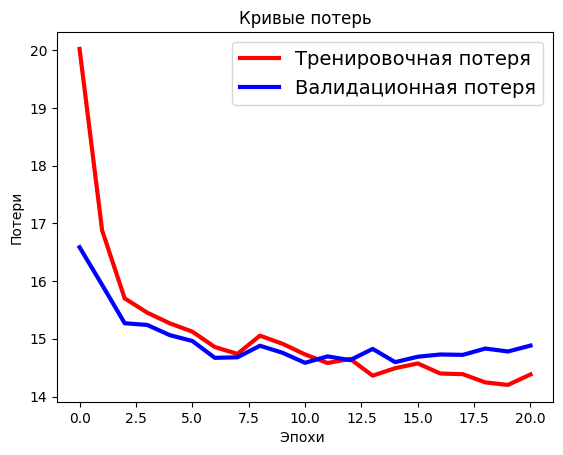

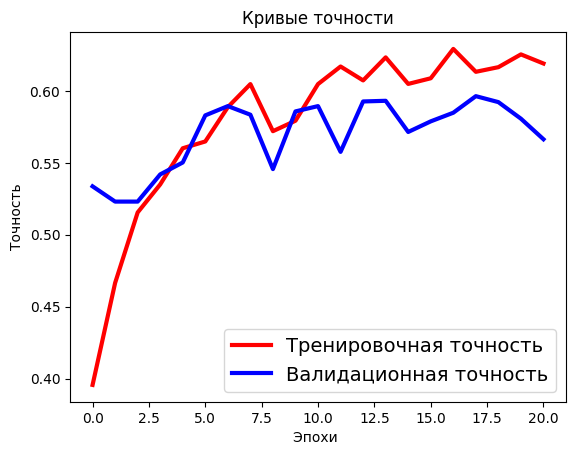

In [ ]:
# Визуализация истории обучения
# Потери
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Тренировочная потеря', 'Валидационная потеря'],fontsize=14)
plt.xlabel('Эпохи ')
plt.ylabel('Потери')
plt.title('Кривые потерь')
plt.show()
# Точность
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Тренировочная точность', 'Валидационная точность'],fontsize=14)
plt.xlabel('Эпохи ')
plt.ylabel('Точность')
plt.title('Кривые точности')
plt.show()